# Libraries

In [1]:
import pandas as pd

# Importing Dataset

In [2]:
dataset = pd.read_csv("YelpChi-restaurant.csv")
print(dataset.head(5))

        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  useful  funny  cool  star_rating  \
0  pbEiXam9YJL3neCYHGwLUA     N       0      0     0            5   
1  pbEiXam9YJL3neCYHGwLUA     N       0      0     0            5   
2  pbEiXam9YJL3neCYHGwLUA     N       0      0     2            3   
3  pbEiXam9YJL3neCYHGwLUA     N       3      0     8            3   
4  pbEiXam9YJL3neCYHGwLUA     N       0      2     1            5   

                                         review_text  
0  Unlike Next, which we'd eaten at the previous ...  
1  Probably one of the best meals I've had ever. ...  
2  Service was impeccable. Experien

In [3]:
punctuations = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~'  
dataset["review_text"] = dataset[
    "review_text"].str.replace("[{}]".format(punctuations), "", regex = True)
print(dataset.head(5))

        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  useful  funny  cool  star_rating  \
0  pbEiXam9YJL3neCYHGwLUA     N       0      0     0            5   
1  pbEiXam9YJL3neCYHGwLUA     N       0      0     0            5   
2  pbEiXam9YJL3neCYHGwLUA     N       0      0     2            3   
3  pbEiXam9YJL3neCYHGwLUA     N       3      0     8            3   
4  pbEiXam9YJL3neCYHGwLUA     N       0      2     1            5   

                                         review_text  
0  Unlike Next which we'd eaten at the previous n...  
1  Probably one of the best meals I've had ever I...  
2  Service was impeccable Experienc

# Preprocessing: Changing Labels


In [4]:
# Changing the labels from Y-N to 1-0.
fake_review_count = 0
real_review_count = 0

print("Progress...")
for i in range(len(dataset)):
  if dataset.loc[i,"label"] == 'N':   # real review
    dataset.loc[i,"label"] = 0     
    real_review_count += 1
  else:   
    dataset.loc[i,"label"] = 1
    fake_review_count += 1
  
  if i % 5000 == 0 and i != 0:
    print(f"{i}\t rows complete")
print("----------------------")

print(f"Fake review Count = {fake_review_count}")
print(f"Real review Count = {real_review_count}")
print(f"Total review Count = {real_review_count + fake_review_count}")
print("\n\n")

print(dataset.head(5))

Progress...
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
Fake review Count = 8141
Real review Count = 53400
Total review Count = 61541



        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  useful  funny  cool  star_rating  \
0  pbEiXam9YJL3neCYHGwLUA     0       0      0     0            5   
1  pbEiXam9YJL3neCYHGwLUA     0       0      0     0            5   
2  pbEiXam9YJL3neCYHGwLUA     0       0  

# Feature: Word Count

In [5]:
print("Progress...")
for i in range(len(dataset)): 
  words = str(dataset.loc[i,"review_text"]).split()
  dataset.loc[i,"word_count"] = len(words)  

  if i % 5000 == 0 and i != 0:
    print(f"{i}\t rows complete")
print("----------------------")

print(dataset.head(5))

Progress...
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  useful  funny  cool  star_rating  \
0  pbEiXam9YJL3neCYHGwLUA     0       0      0     0            5   
1  pbEiXam9YJL3neCYHGwLUA     0       0      0     0            5   
2  pbEiXam9YJL3neCYHGwLUA     0       0      0     2            3   
3  pbEiXam9YJL3neCYHGwLUA     0       3      0     8 

# Feature: Rating Deviation

In [6]:
product_ratings= {}

print("Pass 1 progress")
for i in range(len(dataset)):
  if dataset.loc[i,"product_id"] in product_ratings:
    product_ratings[dataset.loc[i,"product_id"]].append(dataset.loc[i,"star_rating"])
  else:
    product_ratings[dataset.loc[i,"product_id"]] = [dataset.loc[i,"star_rating"]]
  if i % 5000 == 0 and i != 0:
    print(f"{i}\t rows complete")
print("----------------------")

print("Pass 2 progress")
for i in range(len(dataset)):
  sum_of_ratings = sum(product_ratings[dataset.loc[i,"product_id"]])
  no_of_ratings = len(product_ratings[dataset.loc[i,"product_id"]])
  avg = (sum_of_ratings - dataset.loc[i,"star_rating"]) / no_of_ratings

  dataset.loc[i,"rating_deviation"] = abs(dataset.loc[i,"star_rating"] - avg)

  if i % 5000 == 0 and i != 0:
    print(f"{i}\t rows complete")
print("----------------------")


Pass 1 progress
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
Pass 2 progress
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------


# Feature: Maximum Number of Reviews any day

In [7]:
"""
Algorithm 
The complexity of the algorithm is O(n)
The data structure used here is dictionary of dictionaries.

There are three passes. 

Pass1:- Passing over data. 
Here we will be just storing the user_id and 
  the number of different dates on which the user has texted.
The former is the outer dictionary and latter is the inner dictionary. 

The outer dictionary's key is user_id and value is inner dictionary. 
The inner dictionary's key is date and value is the count of reviews on that date. 

Effectively giving out the following code:
dic = {user_id, nested_dic = {date, count}}
eg:- {923: {"2014-12-08": 1}, 924: {"2013-05-16": 1}, 925: {"2013-07-01": 1}, 926: {"2011-07-28": 1}, 927: {"2010-11-01": 1}}
What it contains is, the list of days a user has written review and along with the number of reviews on that day. 

------

Pass2:- Passing over the dic
Here will be using another dictionary to store the maximum reviews on a date. 
The above is extracted by iterating through the dictionary. 
dic2 = { user_id, max_count }
eg:- {923: 1, 924: 1, 925: 1, 926: 1, 927: 1}

------

Pass3:- Filling in the features table.

------

Pseudo Code:- 

#first pass
for i in range(data):
  if user_id exists in dic:
    if date exists in dic[user_id]
      dic[user_id][date] += 1
    else:
      #implies date doesn"t exists
      dic[user_id][date] = 1
  else
    #implies user doesn"t exists
    dic[user_id] = {} 

#second pass
dic2 = { user_id, max_count }

for user_id in dic: #iterating through every key of dic
  count = 0
  
  for date in dic[user_id]: 
    count = max(count, dic[user_id][date])

  dic2[user_id] = count

#Third pass
for i in range(data):
  data[f24_maximum_reviewing_frequency] = dic2[data.loc[i,"user_id"]]
"""

user_review_dates_dictionary = {}

print("Pass 1 Status:- ")
for i in range(len(dataset)):
  if dataset.loc[i,"reviewer_id"] in user_review_dates_dictionary:
    
    if dataset.loc[i,"date"] in user_review_dates_dictionary[dataset.loc[i,"reviewer_id"]]:
      user_review_dates_dictionary[dataset.loc[i,"reviewer_id"]][dataset.loc[i,"date"]] += 1
    else:
      user_review_dates_dictionary[dataset.loc[i,"reviewer_id"]][dataset.loc[i,"date"]] = 1

  else:
    user_review_dates_dictionary[dataset.loc[i,"reviewer_id"]] = {}
    user_review_dates_dictionary[dataset.loc[i,"reviewer_id"]][dataset.loc[i,"date"]] = 1
  
  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")


user_max_review_per_day_dictionary = {} 

for user_id in user_review_dates_dictionary:
  count = 0

  for date in user_review_dates_dictionary[user_id]:
    count = max(count, user_review_dates_dictionary[user_id][date])
  
  user_max_review_per_day_dictionary[user_id] = count

print("Pass 2 Status:- ")
for i in range(len(dataset)):
  dataset.loc[i,"maximum_reviewing_frequency"] = user_max_review_per_day_dictionary[dataset.loc[i,"reviewer_id"]]

  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")

print(dataset.head(5))

Pass 1 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
Pass 2 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  

# Number of reviews

In [8]:
"""
Algorithm
The task is done in two passes of the dataset using a dictionary.

Create a dictionary to hold (user_id, count_of_review_posts) as key-value pairs.

First pass:- 
For each review increment the reviewer"s count.

Second pass:-
For each review assign the corresponding value of reviewer from dictionary. 

"""

reviews_count_per_user = {}

print("Pass 1 Status:- ")
for i in range(len(dataset)):   

  if dataset.loc[i,"reviewer_id"] in reviews_count_per_user:
    reviews_count_per_user[dataset.loc[i,"reviewer_id"]] += 1
  else:
    reviews_count_per_user[dataset.loc[i,"reviewer_id"]] = 1

  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")


print("\n\nPass 2 Status:- ")
for i in range(len(dataset)):

  dataset.loc[i,"number_of_reviews"] = reviews_count_per_user[dataset.loc[i,"reviewer_id"]]

  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")

print(dataset.head(5))

Pass 1 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------


Pass 2 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label

# Feature: Extreme Rating Ratio

In [9]:
"""
Algorithm
The task is done in two passes of the rows and using dictionary.

Create a dictionary to hold (user_id, count_of_max_rating_reviews) as key-value pairs.

First pass:- 
For each review 
  increment the reviewer's count if the rating is in {1,5}

Second pass:-
For each review assign the corresponding value of reviewer from dictionary. 

"""
MAX_RATING = 5
MIN_RATING = 1
extreme_rating_count_per_user = {}

print("Pass 1 Status:- ")
for i in range(len(dataset)):                  
  if dataset.loc[i,"star_rating"] == MIN_RATING or dataset.loc[i,"star_rating"] == MAX_RATING:
    if dataset.loc[i,"reviewer_id"] in extreme_rating_count_per_user:
      extreme_rating_count_per_user[dataset.loc[i,"reviewer_id"]] += 1
    else:
      extreme_rating_count_per_user[dataset.loc[i,"reviewer_id"]] = 1

  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")

print("Pass 2 Status:- ")
for i in range(len(dataset)):
  dataset.loc[i,"extreme_rating_ratio"] = (extreme_rating_count_per_user[dataset.loc[i,"reviewer_id"]] / dataset.loc[i,"number_of_reviews"]) if dataset.loc[i,"reviewer_id"] in extreme_rating_count_per_user else 0.0
  
  if i % 5000 == 0 and i != 0:
      print(f"{i}\t rows complete")
print("----------------------")
    
print(dataset.head(5))

Pass 1 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
Pass 2 Status:- 
5000	 rows complete
10000	 rows complete
15000	 rows complete
20000	 rows complete
25000	 rows complete
30000	 rows complete
35000	 rows complete
40000	 rows complete
45000	 rows complete
50000	 rows complete
55000	 rows complete
60000	 rows complete
----------------------
        date               review_id             reviewer_id  \
0  9/22/2012  GtwU21YOQn-wf4vWRUIx6w  bNYesZ944s6IJVowOnB0iA   
1  9/22/2012                 0LpVTc3  TRKxLC3y-ZvP45e5iilMtw   
2  9/19/2012           tljtLzf68Fkwf  0EMm8umAqXZzyhxNpL4M9g   
3   9/6/2012                     iSN  DlwexC7z88ymAzu45skODw   
4   9/9/2012                  Jmwrh7  kW2dk1CWihmh3g7k9N2G8A   

               product_id label  

# Libraries for Models

In [10]:
import pandas as pd   # for importing features
! pip install -U imbalanced-learn         # for balancing features.
from imblearn.over_sampling import SMOTE  

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt      # for plotting confusion matrix
import seaborn as sns   # templates for confusion matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

ERROR: Invalid requirement: '#'


In [11]:
list(dataset.columns)

['date',
 'review_id',
 'reviewer_id',
 'product_id',
 'label',
 'useful',
 'funny',
 'cool',
 'star_rating',
 'review_text',
 'word_count',
 'rating_deviation',
 'maximum_reviewing_frequency',
 'number_of_reviews',
 'extreme_rating_ratio']

In [12]:
features = dataset.drop(['date', 'review_id', 'reviewer_id', 'product_id', 'review_text'], axis = 'columns')

In [13]:
print(features.head(5))

  label  useful  funny  cool  star_rating  word_count  rating_deviation  \
0     0       0      0     0            5       868.0          0.402494   
1     0       0      0     0            5        65.0          0.402494   
2     0       0      0     2            3        45.0          1.599773   
3     0       3      0     8            3       358.0          1.599773   
4     0       0      2     1            5       168.0          0.402494   

   maximum_reviewing_frequency  number_of_reviews  extreme_rating_ratio  
0                          1.0                2.0              0.500000  
1                          1.0                1.0              1.000000  
2                          1.0                1.0              0.000000  
3                          1.0                1.0              0.000000  
4                          1.0               11.0              0.363636  


In [14]:
X = features.drop('label', axis = 'columns')
y = features['label']
y=y.astype('int')

In [15]:
print(X.head(5))
print("\n----\n")
print(y.head(5))

   useful  funny  cool  star_rating  word_count  rating_deviation  \
0       0      0     0            5       868.0          0.402494   
1       0      0     0            5        65.0          0.402494   
2       0      0     2            3        45.0          1.599773   
3       3      0     8            3       358.0          1.599773   
4       0      2     1            5       168.0          0.402494   

   maximum_reviewing_frequency  number_of_reviews  extreme_rating_ratio  
0                          1.0                2.0              0.500000  
1                          1.0                1.0              1.000000  
2                          1.0                1.0              0.000000  
3                          1.0                1.0              0.000000  
4                          1.0               11.0              0.363636  

----

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32


In [16]:
y.value_counts()

0    53400
1     8141
Name: label, dtype: int64

In [17]:
# Oversampling the minority class.
smote = SMOTE(sampling_strategy = 'minority')
y=y.astype('int')
X, y = smote.fit_resample(X,y)
y.value_counts()

0    53400
1    53400
Name: label, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 3, stratify = y)
print(f"X_train.shape = {X_train.shape}\ny_train.shape = {y_train.shape}")
print(f"\nX_test.shape = {X_test.shape}\ny_test.shape = {y_test.shape}")

X_train.shape = (96120, 9)
y_train.shape = (96120,)

X_test.shape = (10680, 9)
y_test.shape = (10680,)


In [19]:
# What stratify does is it makes splits of equal frequency.
print(f"Traing +ve/-ve split: \n{y_train.value_counts()}")
print()
print(f"Testing +ve/-ve split: \n{y_test.value_counts()}")

Traing +ve/-ve split: 
1    48060
0    48060
Name: label, dtype: int64

Testing +ve/-ve split: 
1    5340
0    5340
Name: label, dtype: int64


# Confusion Matrix

In [20]:
def print_confusion_matrix(y_test, y_prediction):
  cm = confusion_matrix(y_test, y_prediction)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues')
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  print()

In [21]:
def print_roc_curve(y_test, y_prediction):
  fpr, tpr, thresholds = roc_curve(y_test, y_prediction)
  plt.figure(figsize=(5,5))
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()
  print()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      5340
           1       0.75      0.96      0.84      5340

    accuracy                           0.82     10680
   macro avg       0.85      0.82      0.82     10680
weighted avg       0.85      0.82      0.82     10680



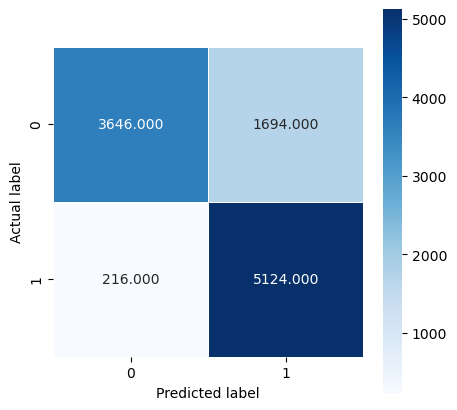

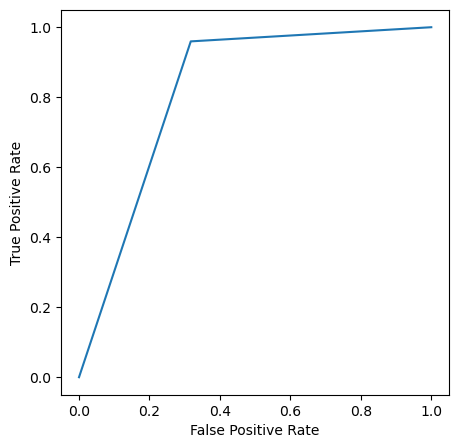

In [22]:
logistic_regression = LogisticRegression(random_state = 0, max_iter = 10000)
logistic_regression = logistic_regression.fit(X_train, y_train)
y_prediction = logistic_regression.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Naive Bayes

              precision    recall  f1-score   support

           0       0.99      0.55      0.71      5340
           1       0.69      0.99      0.81      5340

    accuracy                           0.77     10680
   macro avg       0.84      0.77      0.76     10680
weighted avg       0.84      0.77      0.76     10680



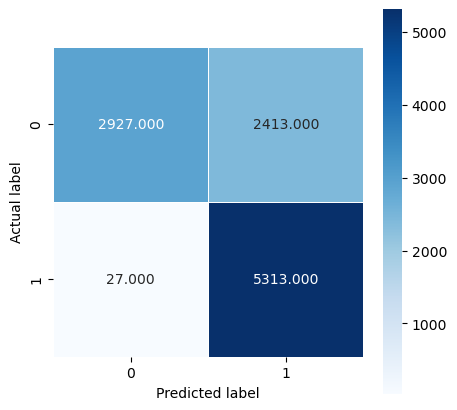

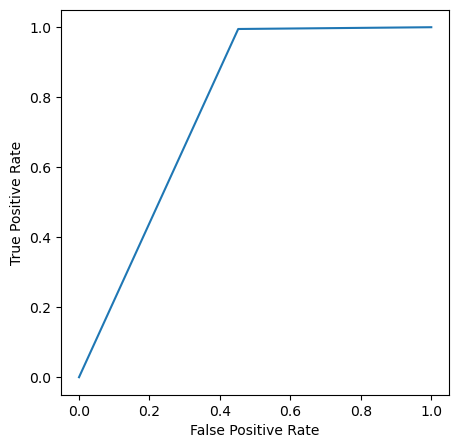

In [23]:
naive_bayes = GaussianNB()
naive_bayes = naive_bayes.fit(X_train, y_train)
y_prediction = naive_bayes.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Decision Tree

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5340
           1       0.89      0.88      0.89      5340

    accuracy                           0.89     10680
   macro avg       0.89      0.89      0.89     10680
weighted avg       0.89      0.89      0.89     10680



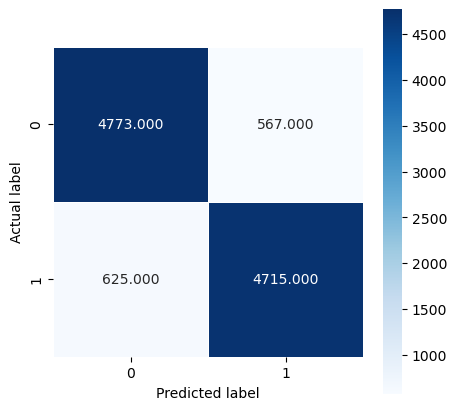

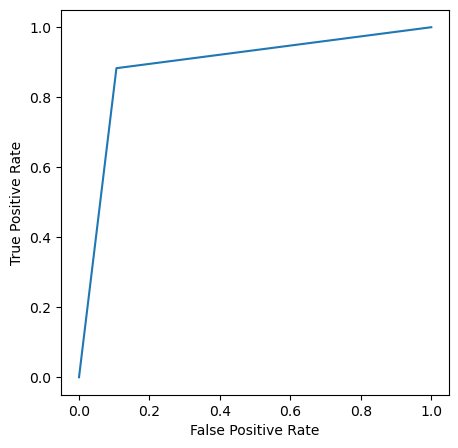

In [24]:
decision_tree = tree.DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
y_prediction = decision_tree.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# Random Forest

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      5340
           1       0.89      0.88      0.89      5340

    accuracy                           0.89     10680
   macro avg       0.89      0.89      0.89     10680
weighted avg       0.89      0.89      0.89     10680



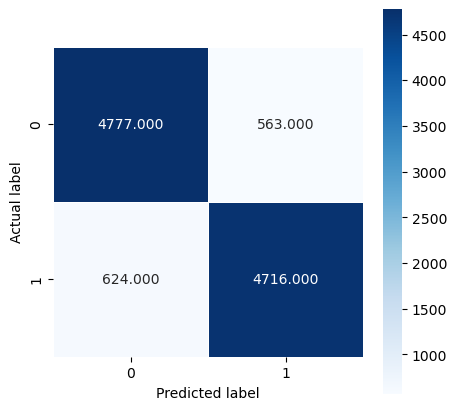

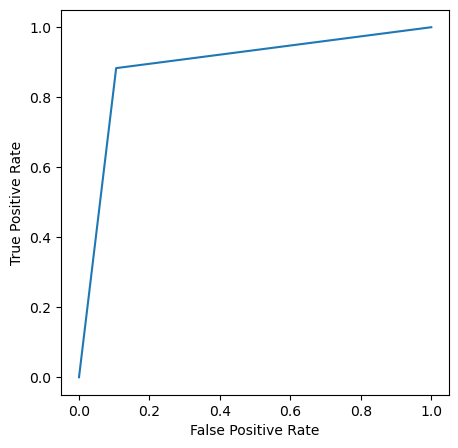

In [25]:
random_forest = RandomForestClassifier(n_estimators=10)
random_forest = random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)

# XGBoost

              precision    recall  f1-score   support

           0       0.94      0.77      0.84      5340
           1       0.80      0.95      0.87      5340

    accuracy                           0.86     10680
   macro avg       0.87      0.86      0.86     10680
weighted avg       0.87      0.86      0.86     10680



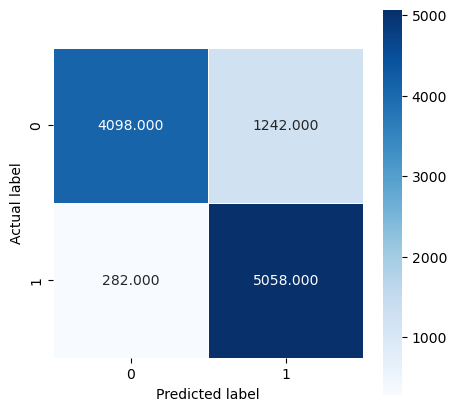

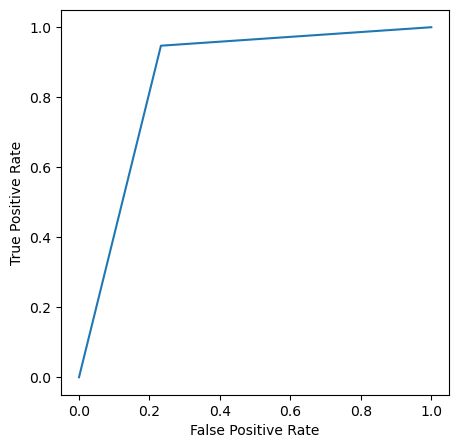

In [26]:
gradient_boost = GradientBoostingClassifier(n_estimators = 100, 
                                            learning_rate = 1.0,
                                            max_depth = 1, 
                                            random_state=0)
gradient_boost = gradient_boost.fit(X_train, y_train)
y_prediction = gradient_boost.predict(X_test)

print(classification_report(y_test, y_prediction))
print_confusion_matrix(y_test, y_prediction)
print_roc_curve(y_test, y_prediction)